# Project Task: Week 1

# Exploratory Data Analysis (EDA):

1. Perform an EDA on the Dataset.

    - Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation

    - Find if there is any connection between Time, Amount, and the transaction being fraudulent.

2. Check the class count for each class. It’s a class Imbalance problem.

3. Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

    - Oversampling or undersampling can be used to tackle the class imbalance problem

    - Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.

4. Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Essential libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dropout,Dense,Reshape,BatchNormalization
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [3]:
# Import the train dataset
train_df = pd.read_csv('train_data.csv')
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [4]:
# Import the test dataset
test_df = pd.read_csv('test_data.csv')
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00


In [5]:
# Import the test hidden dataset
test_hidden_df = pd.read_csv('test_data_hidden.csv')
test_hidden_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [6]:
# Find out the shape of the dataset
print('Train Dataset Shape :-',train_df.shape)
print('Test Dataset Shape :-',test_df.shape)
print('Test Hidden Dataset Shape :-',test_hidden_df.shape)

Train Dataset Shape :- (227845, 31)
Test Dataset Shape :- (56962, 30)
Test Hidden Dataset Shape :- (56962, 31)


In [7]:
# Combine the train and test hidden dataset
dataset = pd.concat([train_df,test_hidden_df])
print('Shape of the combine dataset :',dataset.shape)
dataset.head()

Shape of the combine dataset : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [8]:
# Find out types of data
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Project Task: Week 1

# Exploratory Data Analysis (EDA):

# 1. Perform an EDA on the Dataset.

- Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation

- Find if there is any connection between Time, Amount, and the transaction being fraudulent.

In [9]:
# Find out the dataset is missing or not.
print("Is null value present is the dataset :- ",dataset.isna().sum().any())
print('\n',dataset.isna().sum())

Is null value present is the dataset :-  False

 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 56961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284

### Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation

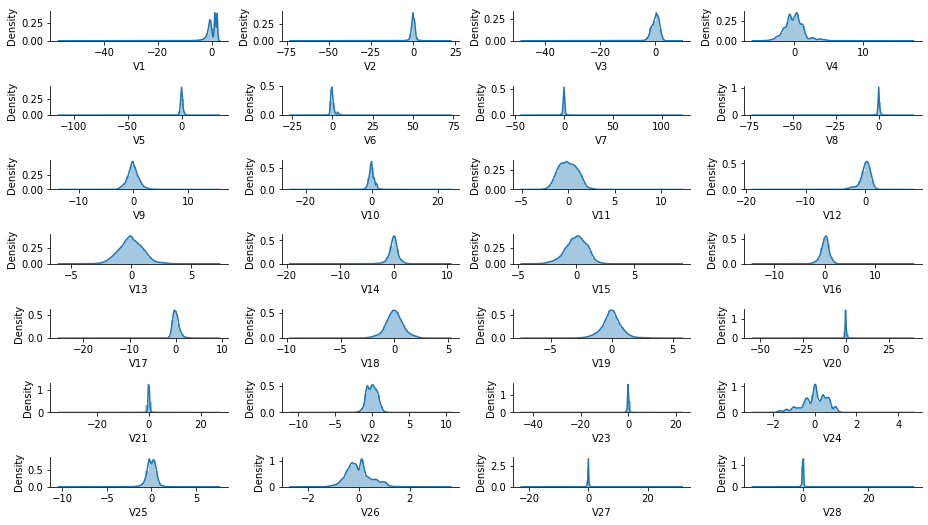

In [11]:
feature = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 
           'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

plt.figure(figsize=(13,10))
n = 1
for f in feature:
    plt.subplot(10,4,n)
    sns.distplot(dataset[f],kde=True)
    sns.despine()
    n = n+1
plt.tight_layout()
plt.show()

In [12]:
for f in feature:
    print('Features',f,'Mean is',round(dataset[f].mean(),3),'and Standard Deviation is',round(dataset[f].std(),3))

Features V1 Mean is 0.0 and Standard Deviation is 1.959
Features V2 Mean is 0.0 and Standard Deviation is 1.651
Features V3 Mean is -0.0 and Standard Deviation is 1.516
Features V4 Mean is 0.0 and Standard Deviation is 1.416
Features V5 Mean is 0.0 and Standard Deviation is 1.38
Features V6 Mean is 0.0 and Standard Deviation is 1.332
Features V7 Mean is -0.0 and Standard Deviation is 1.237
Features V8 Mean is 0.0 and Standard Deviation is 1.194
Features V9 Mean is -0.0 and Standard Deviation is 1.099
Features V10 Mean is 0.0 and Standard Deviation is 1.089
Features V11 Mean is 0.0 and Standard Deviation is 1.021
Features V12 Mean is -0.0 and Standard Deviation is 0.999
Features V13 Mean is 0.0 and Standard Deviation is 0.995
Features V14 Mean is 0.0 and Standard Deviation is 0.959
Features V15 Mean is 0.0 and Standard Deviation is 0.915
Features V16 Mean is 0.0 and Standard Deviation is 0.876
Features V17 Mean is -0.0 and Standard Deviation is 0.849
Features V18 Mean is 0.0 and Standar

### Find if there is any connection between Time, Amount, and the transaction being fraudulent.

In [13]:
dataset[['Time','Amount','Class']].corr()

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


- From the above result we can confirm that there is no any connection between Time, Amount and the transaction being fraudulent.

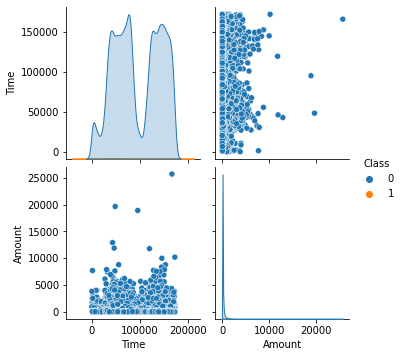

In [14]:
sns.pairplot(dataset.reset_index(drop=True),x_vars=['Time','Amount'],y_vars=['Time','Amount'],kind='scatter',hue='Class')

# 2. Check the class count for each class. It’s a class Imbalance problem.

In [15]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset represents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

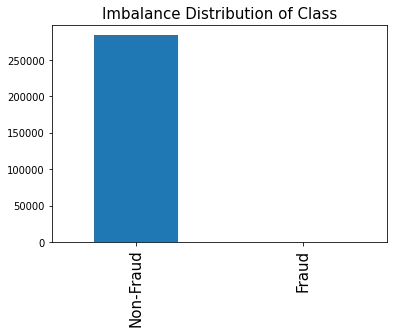

In [16]:
df = dataset.copy()
df.Class.replace((0,1),('Non-Fraud','Fraud'),inplace=True)
df.Class.value_counts().plot(kind='bar')
plt.title('Imbalance Distribution of Class',fontsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

# 3. Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

- Oversampling or undersampling can be used to tackle the class imbalance problem

- Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.

### Oversampling

In [17]:
count_0,count_1 = dataset.Class.value_counts()

class_1 = dataset[dataset['Class'] == 1]
class_0 = dataset[dataset['Class'] == 0]

class_1_over = class_1.sample(count_0,replace=True)

dataset_over = pd.concat([class_0,class_1_over],axis=0)
print('Before Oversampling')
print(dataset.Class.value_counts())
print('\n')
print('Random Under Sampling:')
print(dataset_over.Class.value_counts())

Before Oversampling
0    284315
1       492
Name: Class, dtype: int64


Random Under Sampling:
0    284315
1    284315
Name: Class, dtype: int64


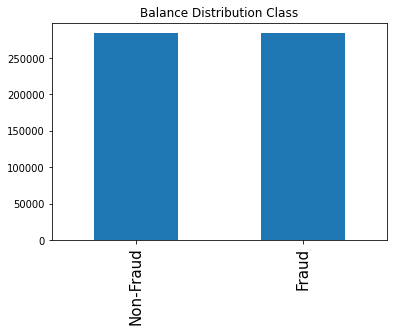

In [18]:
# Convert the Class

df_over = dataset_over.copy()
df_over.Class.replace((0,1),('Non-Fraud','Fraud'),inplace=True)
df_over.Class.value_counts().plot(kind='bar')
plt.title('Balance Distribution Class')
plt.tick_params(axis='x', which='major', labelsize=15)

### Undersampling

In [19]:
count_0,count_1 = dataset.Class.value_counts()

class_1 = dataset[dataset['Class'] == 1]
class_0 = dataset[dataset['Class'] == 0]

class_0_under = class_0.sample(count_1,replace=True)

dataset_under = pd.concat([class_1,class_0_under],axis=0)
print('Before Oversampling')
print(dataset.Class.value_counts())
print('\n')
print('Random Under Sampling:')
print(dataset_under.Class.value_counts())

Before Oversampling
0    284315
1       492
Name: Class, dtype: int64


Random Under Sampling:
1    492
0    492
Name: Class, dtype: int64


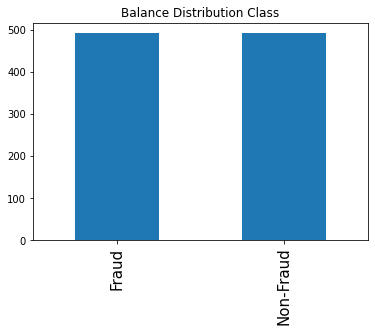

In [20]:
# Convert the Class

df_under = dataset_under.copy()
df_under.Class.replace((0,1),('Non-Fraud','Fraud'),inplace=True)
df_under.Class.value_counts().plot(kind='bar')
plt.title('Balance Distribution Class')
plt.tick_params(axis='x', which='major', labelsize=15)

In [21]:
# Over sample data scaling

data = dataset_over.drop(columns=['Class']).values
scaler = StandardScaler()
dataset_over_scale = scaler.fit_transform(data)

In [22]:
xtrain_over,xtest_over,ytrain_over,ytest_over = train_test_split(dataset_over_scale,dataset_over['Class'],test_size=0.2,
                                                                random_state=41)

In [23]:
print(xtrain_over.shape)
print(xtest_over.shape)
print(ytrain_over.shape)
print(ytest_over.shape)

(454904, 30)
(113726, 30)
(454904,)
(113726,)


# Modeling Techniques:

5. Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best

6. Use different Tree-based classifiers like Random Forest and XGBoost. 

- Remember Tree-based classifiers work on two ideologies: Bagging or Boosting

- Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.

7. Compare the results of 1 with 2 and check if there is any incremental gain.

# 5. Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best

## Modeling with Oversampled dataset

### Bernoulli Naive Bayes with oversampled dataset

In [24]:
bnb_model_over = BernoulliNB()
bnb_model_over.fit(xtrain_over,ytrain_over)

BernoulliNB()

In [25]:
ypred = bnb_model_over.predict(xtest_over)
bnb_acc_over = accuracy_score(ytest_over, ypred)*100
print ("\nAccuracy on validation set: {:.4f}".format(bnb_acc_over))
print("\nClassification report : \n", classification_report(ytest_over, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(ytest_over, ypred))
print("\nTrain Data Score : ",bnb_model_over.score(xtrain_over,ytrain_over))
print("\nTest Data Score : ",bnb_model_over.score(xtest_over,ytest_over))


Accuracy on validation set: 91.1436

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92     56864
           1       0.99      0.83      0.90     56862

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726


Confusion Matrix : 
 [[56450   414]
 [ 9658 47204]]

Train Data Score :  0.9115637585072894

Test Data Score :  0.9114362590788386


### Receiver operating characteristic of Bernoulli Naive Bayes with Oversampled dataset

0.9453125380404437


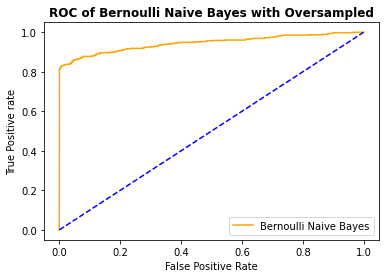

In [26]:
pred_prob = bnb_model_over.predict_proba(xtest_over)
fpr1,tpr1,threshold1=roc_curve(ytest_over,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest_over))]
P_fpr,p_tpr,_=roc_curve(ytest_over,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest_over, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='Bernoulli Naive Bayes')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of Bernoulli Naive Bayes with Oversampled',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Logistic Regression with oversampled dataset

In [27]:
lr_model_over = LogisticRegression()
lr_model_over.fit(xtrain_over,ytrain_over)

LogisticRegression()

In [28]:
ypred = lr_model_over.predict(xtest_over)
lr_acc_over = accuracy_score(ytest_over, ypred)*100
print ("\nAccuracy on validation set: {:.4f}".format(lr_acc_over))
print("\nClassification report : \n", classification_report(ytest_over, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(ytest_over, ypred))
print("\nTrain Data Score : ",lr_model_over.score(xtrain_over,ytrain_over))
print("\nTest Data Score : ",lr_model_over.score(xtest_over,ytest_over))


Accuracy on validation set: 94.9431

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56864
           1       0.98      0.92      0.95     56862

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


Confusion Matrix : 
 [[55549  1315]
 [ 4436 52426]]

Train Data Score :  0.950402722332624

Test Data Score :  0.9494310887571883


### Receiver operating characteristic for Logistic Regression with Oversampled dataset

0.9871329793350258


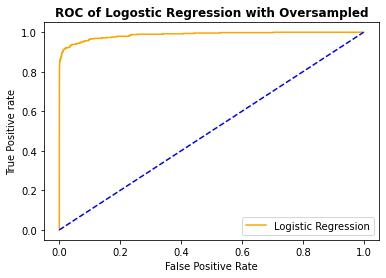

In [29]:
pred_prob = lr_model_over.predict_proba(xtest_over)
fpr1,tpr1,threshold1=roc_curve(ytest_over,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest_over))]
P_fpr,p_tpr,_=roc_curve(ytest_over,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest_over, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='Logistic Regression')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of Logostic Regression with Oversampled',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Support Vector Machine with Oversampled dataset

In [30]:
# %%time
# svm_over = SVC(class_weight='balanced',probability=True)
# svm_over.fit(xtrain_over,ytrain_over)

In [31]:
# linear_pred = svm_over.predict(xtest_over)

In [32]:
# svm_acc_over = accuracy_score(ytest_over, linear_pred)*100
# print ("\nAccuracy on validation set: {:.4f}".format(svm_acc_over))
# print("\nClassification report : \n", classification_report(ytest_over, linear_pred))
# print("\nConfusion Matrix : \n", confusion_matrix(ytest_over, linear_pred))
# print("\nTrain Data Score : ",svm_over.score(xtrain_over,ytrain_over))
# print("\nTest Data Score : ",svm_over.score(xtest_over,ytest_over))

### Receiver operating characteristic of Support Vector Machine with Oversampled dataset

In [33]:
# pred_prob = svm_over.predict_proba(xtest_over)
# fpr1,tpr1,threshold1=roc_curve(ytest_over,pred_prob[:,1])

# # ROC curve for tpr=fpr
# random_prob=[0 for i in range (len(ytest_over))]
# P_fpr,p_tpr,_=roc_curve(ytest_over,random_prob)

# # auc scores
# auc_score1 = roc_auc_score(ytest_over, pred_prob[:,1])
# print(auc_score1)

# plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='SVM')
# plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
# plt.title('ROC of Support Vector Machine with Oversampled',weight='bold')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')
# plt.legend(loc='best')
# plt.show()

## Modeling with Undersampled

In [34]:
# Under sample data scaling

data = dataset_under.drop(columns=['Class']).values
scaler = StandardScaler()
dataset_under_scale = scaler.fit_transform(data)

In [35]:
xtrain_under,xtest_under,ytrain_under,ytest_under = train_test_split(dataset_under_scale,dataset_under['Class'],
                                                                     test_size=0.2, random_state=41)

In [36]:
print(xtrain_under.shape)
print(xtest_under.shape)
print(ytrain_under.shape)
print(ytest_under.shape)

(787, 30)
(197, 30)
(787,)
(197,)


### Bernoulli Naive Bayes with Undersampled dataset

In [37]:
bnb_model_under = BernoulliNB()
bnb_model_under.fit(xtrain_under,ytrain_under)

BernoulliNB()

In [38]:
ypred = bnb_model_under.predict(xtest_under)
bnb_acc_under = accuracy_score(ytest_under, ypred)*100
print ("\nAccuracy on validation set: {:.4f}".format(bnb_acc_under))
print("\nClassification report : \n", classification_report(ytest_under, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(ytest_under, ypred))
print("\nTrain Data Score : ",bnb_model_under.score(xtrain_under,ytrain_under))
print("\nTest Data Score : ",bnb_model_under.score(xtest_under,ytest_under))


Accuracy on validation set: 92.8934

Classification report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       121
           1       1.00      0.82      0.90        76

    accuracy                           0.93       197
   macro avg       0.95      0.91      0.92       197
weighted avg       0.94      0.93      0.93       197


Confusion Matrix : 
 [[121   0]
 [ 14  62]]

Train Data Score :  0.9034307496823379

Test Data Score :  0.9289340101522843


### Receiver operating characteristic of Bernoulli Naive Bayes with undersampled dataset¶

0.942040017398869


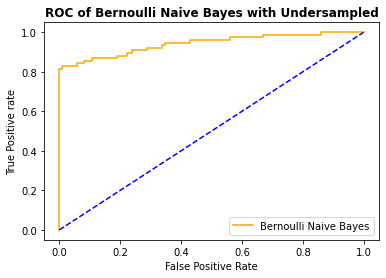

In [39]:
pred_prob = bnb_model_under.predict_proba(xtest_under)
fpr1,tpr1,threshold1=roc_curve(ytest_under,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest_under))]
P_fpr,p_tpr,_=roc_curve(ytest_under,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest_under, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='Bernoulli Naive Bayes')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of Bernoulli Naive Bayes with Undersampled',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Logistic Regression with Undersampled dataset

In [40]:
lr_model_under = LogisticRegression()
lr_model_under.fit(xtrain_under,ytrain_under)

LogisticRegression()

In [41]:
ypred = lr_model_under.predict(xtest_under)
lr_acc_under = accuracy_score(ytest_under, ypred)*100
print ("\nAccuracy on validation set: {:.4f}".format(lr_acc_under))
print("\nClassification report : \n", classification_report(ytest_under, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(ytest_under, ypred))
print("\nTrain Data Score : ",lr_model_under.score(xtrain_under,ytrain_under))
print("\nTest Data Score : ",lr_model_under.score(xtest_under,ytest_under))


Accuracy on validation set: 94.9239

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       121
           1       0.97      0.89      0.93        76

    accuracy                           0.95       197
   macro avg       0.95      0.94      0.95       197
weighted avg       0.95      0.95      0.95       197


Confusion Matrix : 
 [[119   2]
 [  8  68]]

Train Data Score :  0.9491740787801779

Test Data Score :  0.949238578680203


### Receiver operating characteristic of Logistic Regression with undersampled dataset¶

0.9865158764680296


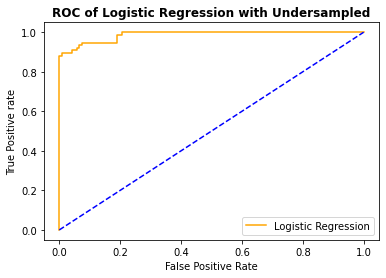

In [42]:
pred_prob = lr_model_under.predict_proba(xtest_under)
fpr1,tpr1,threshold1=roc_curve(ytest_under,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest_under))]
P_fpr,p_tpr,_=roc_curve(ytest_under,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest_under, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='Logistic Regression')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of Logistic Regression with Undersampled',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### Support Vector Machine with Undersampled dataset

In [43]:
%%time
svm_under = SVC(class_weight='balanced',probability=True)
svm_under.fit(xtrain_under,ytrain_under)

Wall time: 1.24 s


SVC(class_weight='balanced', probability=True)

In [44]:
svm_pred_under = svm_under.predict(xtest_under)
svm_acc_under = accuracy_score(ytest_under, svm_pred_under)*100
print ("\nAccuracy on validation set: {:.4f}".format(svm_acc_under))
print("\nClassification report : \n", classification_report(ytest_under, svm_pred_under))
print("\nConfusion Matrix : \n", confusion_matrix(ytest_under, svm_pred_under))
print("\nTrain Data Score : ",svm_under.score(xtest_under,ytest_under))
print("\nTest Data Score : ",svm_under.score(xtest_under,ytest_under))


Accuracy on validation set: 92.8934

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       121
           1       0.96      0.86      0.90        76

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.92       197
weighted avg       0.93      0.93      0.93       197


Confusion Matrix : 
 [[118   3]
 [ 11  65]]

Train Data Score :  0.9289340101522843

Test Data Score :  0.9289340101522843


0.983906046107003


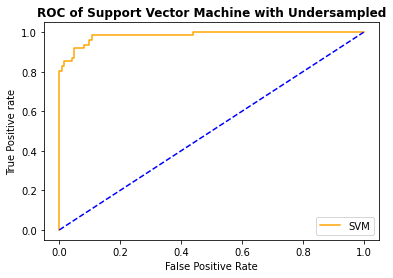

In [45]:
pred_prob = svm_under.predict_proba(xtest_under)
fpr1,tpr1,threshold1=roc_curve(ytest_under,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest_under))]
P_fpr,p_tpr,_=roc_curve(ytest_under,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest_under, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='SVM')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of Support Vector Machine with Undersampled',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# 6. Use different Tree-based classifiers like Random Forest and XGBoost. 

- Remember Tree-based classifiers work on two ideologies: Bagging or Boosting

- Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.

In [46]:
data = train_df.drop(columns=['Class']).values
scaler = StandardScaler()
train_data = scaler.fit_transform(data)

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(train_data,train_df['Class'],test_size=0.2,random_state=41)

In [48]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(182276, 30)
(182276,)
(45569, 30)
(45569,)


### Random Forest Classifier

In [49]:
%%time
rfc_model = RandomForestClassifier(n_estimators=400,random_state=11,class_weight='balanced')
rfc_model.fit(xtrain,ytrain)

Wall time: 18min 14s


RandomForestClassifier(class_weight='balanced', n_estimators=400,
                       random_state=11)

In [50]:
ypred = rfc_model.predict(xtest)
rfc_acc = accuracy_score(ytest, ypred)*100
print ("\nAccuracy on validation set: {:.4f}".format(rfc_acc))
print("\nClassification report : \n", classification_report(ytest, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(ytest, ypred))
print("\nTrain Data Score : ",rfc_model.score(xtrain,ytrain))
print("\nTest Data Score : ",rfc_model.score(xtest,ytest))


Accuracy on validation set: 99.9561

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45503
           1       0.94      0.74      0.83        66

    accuracy                           1.00     45569
   macro avg       0.97      0.87      0.92     45569
weighted avg       1.00      1.00      1.00     45569


Confusion Matrix : 
 [[45500     3]
 [   17    49]]

Train Data Score :  1.0

Test Data Score :  0.9995611051372644


0.9748245037456738


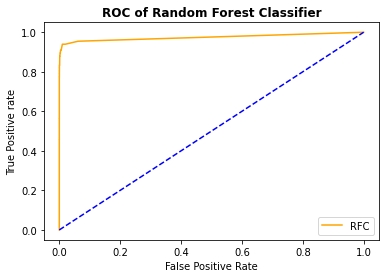

In [51]:
pred_prob = rfc_model.predict_proba(xtest)
fpr1,tpr1,threshold1=roc_curve(ytest,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest))]
P_fpr,p_tpr,_=roc_curve(ytest,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='RFC')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of Random Forest Classifier',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

### XGBClassifier

In [52]:
%%time
xgb_model = XGBClassifier(n_estimators=1000,max_depth=6,scale_pos_weight=99)
xgb_model.fit(xtrain,ytrain)

Wall time: 8min 59s
Parser   : 112 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
ypred = xgb_model.predict(xtest)
xgb_acc = accuracy_score(ytest, ypred)*100
print ("\nAccuracy on validation set: {:.4f}".format(xgb_acc))
print("\nClassification report : \n", classification_report(ytest, ypred))
print("\nConfusion Matrix : \n", confusion_matrix(ytest, ypred))
print("\nTrain Data Score : ",xgb_model.score(xtrain,ytrain))
print("\nTest Data Score : ",xgb_model.score(xtest,ytest))


Accuracy on validation set: 99.9627

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45503
           1       0.93      0.80      0.86        66

    accuracy                           1.00     45569
   macro avg       0.96      0.90      0.93     45569
weighted avg       1.00      1.00      1.00     45569


Confusion Matrix : 
 [[45499     4]
 [   13    53]]

Train Data Score :  1.0

Test Data Score :  0.9996269393666747


0.9883304397512253


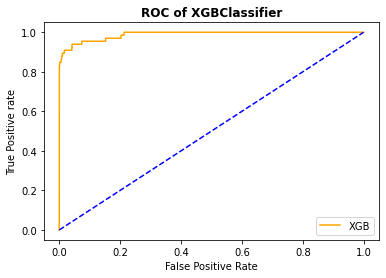

In [54]:
pred_prob = xgb_model.predict_proba(xtest)
fpr1,tpr1,threshold1=roc_curve(ytest,pred_prob[:,1])

# ROC curve for tpr=fpr
random_prob=[0 for i in range (len(ytest))]
P_fpr,p_tpr,_=roc_curve(ytest,random_prob)

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob[:,1])
print(auc_score1)

plt.plot(fpr1,tpr1,linestyle='-',color='orange',label='XGB')
plt.plot(P_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC of XGBClassifier',weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# 7. Compare the results of 1 with 2 and check if there is any incremental gain.

In [55]:
models = pd.DataFrame({
    'Models' : ['Bernaulli Naive Bayes Over-Sampled','Logistic Regression Over-Sampled',
                'Bernaulli Naive Bayes Under-Sampled','Logistic Regression Under-Sampled','SVM Under-Sampled',
                'Random Fosrest Classifier','XGB',], 
    'Score' : [bnb_acc_over,lr_acc_over,bnb_acc_under,lr_acc_under,svm_acc_under,rfc_acc,xgb_acc]})

round(models.sort_values(by='Score',ascending=False),2)

,Models,Score
6,XGB,99.96
5,Random Fosrest Classifier,99.96
1,Logistic Regression Over-Sampled,94.94
3,Logistic Regression Under-Sampled,94.92
2,Bernaulli Naive Bayes Under-Sampled,92.89
4,SVM Under-Sampled,92.89
0,Bernaulli Naive Bayes Over-Sampled,91.14


- From above test its shows that the tree base (XGB classifier) models are best performed.

# Project Task: Week 2

# Applying ANN:

1. Use ANN (Artificial Neural Network) to predict Store Sales.

    - Fine-tune number of layers

    - Number of Neurons in each layers

    - Experiment in batch-size

    - Experiment with number of epochs. Check the observations in loss and accuracy

    - Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop

    - Find out which activation performs best for this use case and why?

    - Calculate RMSE

    - Check Confusion Matrix, Precision, Recall and F1-Score

2. Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 

3. Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

In [56]:
model = Sequential()
model.add(Reshape((30,),input_shape=(30,)))
model.add(BatchNormalization())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [57]:
# Adam optimizers

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=512,validation_data=(xtest,ytest))

# Model Evaluation
adam_score = model.evaluate(xtest,ytest, batch_size=512)
print('\nTest loss : {:.4f}'.format(adam_score[0]*100))
print('\nTest accuracy : {:.4f}'.format(adam_score[1]*100))

y_classes_test = np.argmax(model.predict(xtest, verbose=0),axis=1)
# reduce the output to 1d array
yhat_classes_test = y_classes_test.reshape(-1,1)

print('\nConfusion Maxtrix :')
print(confusion_matrix(y_true=ytest,y_pred=yhat_classes_test))
print('\nClassification Report : ')
print(classification_report(y_true=ytest,y_pred=yhat_classes_test))

Epoch 1/10
357/357 [==============================] - 29s 17ms/step - loss: 0.2623 - accuracy: 0.9104 - val_loss: 0.0246 - val_accuracy: 0.9993
Epoch 2/10
357/357 [==============================] - 5s 13ms/step - loss: 0.0185 - accuracy: 0.9983 - val_loss: 0.0100 - val_accuracy: 0.9993
Epoch 3/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 0.0074 - val_accuracy: 0.9994
Epoch 4/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 5/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 6/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 7/10
357/357 [==============================] - 6s 16ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.999

In [58]:
# Stochastic Gardient Descent optimizers

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=512,validation_data=(xtest,ytest))

# Model Evaluation
sgd_score = model.evaluate(xtest,ytest, batch_size=512)
print('\nTest loss : {:.4f}'.format(sgd_score[0]*100))
print('\nTest accuracy : {:.4f}'.format(sgd_score[1]*100))

y_classes_test = np.argmax(model.predict(xtest, verbose=0),axis=1)
# reduce the output to 1d array
yhat_classes_test = y_classes_test.reshape(-1,1)

print('\nConfusion Maxtrix :')
print(confusion_matrix(y_true=ytest,y_pred=yhat_classes_test))
print('\nClassification Report : ')
print(classification_report(y_true=ytest,y_pred=yhat_classes_test))

Epoch 1/10
357/357 [==============================] - 9s 14ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 2/10
357/357 [==============================] - 4s 12ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 3/10
357/357 [==============================] - 4s 12ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 4/10
357/357 [==============================] - 5s 13ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 5/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 6/10
357/357 [==============================] - 5s 13ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 7/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9993

In [59]:
# RMSProp optimizer

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=512,validation_data=(xtest,ytest))

# Model Evaluation
rms_score = model.evaluate(xtest,ytest, batch_size=512)
print('\nTest loss : {:.4f}'.format(rms_score[0]*100))
print('\nTest accuracy : {:.4f}'.format(rms_score[1]*100))

y_classes_test = np.argmax(model.predict(xtest, verbose=0),axis=1)
# reduce the output to 1d array
yhat_classes_test = y_classes_test.reshape(-1,1)

print('\nConfusion Maxtrix :')
print(confusion_matrix(y_true=ytest,y_pred=yhat_classes_test))
print('\nClassification Report : ')
print(classification_report(y_true=ytest,y_pred=yhat_classes_test))

Epoch 1/10
357/357 [==============================] - 11s 16ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 2/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0060 - val_accuracy: 0.9994
Epoch 3/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 4/10
357/357 [==============================] - 5s 15ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 5/10
357/357 [==============================] - 5s 15ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 6/10
357/357 [==============================] - 6s 17ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9994
Epoch 7/10
357/357 [==============================] - 5s 14ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.999

### Observation:-

In [60]:
models = pd.DataFrame({
    'Models' : ['Bernaulli Naive Bayes Over-Sampled','Logistic Regression Over-Sampled',
                'Bernaulli Naive Bayes Under-Sampled','Logistic Regression Under-Sampled','SVM Under-Sampled',
                'Random Fosrest Classifier','XGB','Adam_optimizer_NN','SGD_optimizer_NN','RMSProp_optimizer_NN'], 
    'Score' : [bnb_acc_over,lr_acc_over,bnb_acc_under,lr_acc_under,svm_acc_under,rfc_acc,xgb_acc,
              adam_score[1]*100,sgd_score[1]*100,rms_score[1]*100]})

round(models.sort_values(by='Score',ascending=False),2)

,Models,Score
6,XGB,99.96
5,Random Fosrest Classifier,99.96
9,RMSProp_optimizer_NN,99.94
7,Adam_optimizer_NN,99.93
8,SGD_optimizer_NN,99.93
1,Logistic Regression Over-Sampled,94.94
3,Logistic Regression Under-Sampled,94.92
2,Bernaulli Naive Bayes Under-Sampled,92.89
4,SVM Under-Sampled,92.89
0,Bernaulli Naive Bayes Over-Sampled,91.14


# 3. Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

### Cross Validation:-

In [61]:
#Extract features and label
X_train=train_df.drop(columns=['Class']).values
y_train=train_df['Class'].values

X_test=test_hidden_df.drop(columns=['Class']).values
y_test=test_hidden_df['Class'].values
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test.shape,y_test.shape)

the shape of X_train and  y_train:  (227845, 30) (227845,)
the shape of X_test and  y_test:  (56962, 30) (56962,)


In [62]:
COLUMN_NAMES = ["Approach","Model Name","F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)

def model_traintest_CV(model_obj, model_name, approach, n_splits, X, y):
    global df_model_selection
    
    skf = StratifiedKFold(n_splits, random_state=12,shuffle=True)
    
    weighted_f1_score = []
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        
        model_obj.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)
        # predict  classes
        yhat_classes_train = np.argmax(model_obj.predict(X_train, verbose=0),axis=1)
        yhat_classes_test = np.argmax(model_obj.predict(X_test, verbose=0),axis=1)

        # reduce the output to 1d array
        yhat_classes_train = yhat_classes_train.reshape(-1, 1)
        yhat_classes_test = yhat_classes_test.reshape(-1, 1)
        
        #Accuracy Score for train Data
        #accuracy_score_train=accuracy_score(y_true=y_train,y_pred=yhat_classes_train)
        
        #test_ds_predicted = model_obj.predict( X_test )
        
        weighted_f1_score.append(round(f1_score(y_true=y_test, y_pred=yhat_classes_test , average='weighted'),2))   
         
    sd_weighted_f1_score = np.std(weighted_f1_score, ddof=1)
    range_of_f1_scores = "{}-{}".format(min(weighted_f1_score),max(weighted_f1_score))    
    df_model_selection = pd.concat([df_model_selection,
                                    pd.DataFrame([[approach,model_name,sorted(weighted_f1_score),
                                                   range_of_f1_scores,sd_weighted_f1_score]], columns =COLUMN_NAMES) ])

In [63]:
%%time
X=X_train
y=y_train
n_splits=5
approach='Neural Network'
model_obj=model
model_name='Neural Network'
model_traintest_CV(model_obj, model_name, approach, n_splits, X, y)
df_model_selection

Wall time: 27min 59s


,Approach,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Neural Network,Neural Network,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.0-1.0,0.0


In [64]:
%%time
# Now lets try to get the Scores using StratifiedKFold Cross Validation for Neural Network
#Initialize the algo
model_obj=model
X=X_train
y=y_train

#Initialize StratifiedKFold Method
kfold = StratifiedKFold(n_splits, random_state=12,shuffle=True)

#Initialize For Loop 
i=0
for train,test in kfold.split(X,y):
    i = i+1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    
    model_obj.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)
    # predict  classes
    yhat_classes_train = np.argmax(model_obj.predict(X_train, verbose=0),axis=1)
    yhat_classes_test = np.argmax(model_obj.predict(X_test, verbose=0),axis=1)

    # reduce the output to 1d array
    yhat_classes_train = yhat_classes_train.reshape(-1, 1)
    yhat_classes_test = yhat_classes_test.reshape(-1, 1)
    
    test_f1_score=round(f1_score(y_true=y_test, y_pred=yhat_classes_test , average='weighted'),2)
    train_f1_score=round(f1_score(y_true=y_train, y_pred=yhat_classes_train , average='weighted'),2)
    
    print("Train f1-Score: {}, Test f1-score: {}, for Sample Split: {}".format(train_f1_score,test_f1_score,i))

Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 1
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 2
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 3
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 4
Train f1-Score: 1.0, Test f1-score: 1.0, for Sample Split: 5
Wall time: 36min 43s
Parser   : 519 ms


In [65]:
%%time
#Lets extract the Train and Test sample for split 2
kfold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=0
for train,test in kfold.split(X,y):
    i = i+1
    if i == 2:
        X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]

model_obj.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)

Wall time: 7min 16s
Compiler : 112 ms
Parser   : 4.44 s


In [66]:
%%time
X_test=test_hidden_df.drop(columns=['Class']).values # Unseen data
y_test=test_hidden_df['Class'].values                # Unseen data

# predict  classes
yhat_classes_train = np.argmax(model_obj.predict(X_train, verbose=0),axis=1)
yhat_classes_test = np.argmax(model_obj.predict(X_test, verbose=0),axis=1)

# reduce the output to 1d array
yhat_classes_train = yhat_classes_train.reshape(-1,1)
yhat_classes_test = yhat_classes_test.reshape(-1,1)

#Accuracy Score for train Data
accuracy_score_train=accuracy_score(y_true=y_train,y_pred=yhat_classes_train)
#Accuracy Score for test Data
accuracy_score_test=accuracy_score(y_true=y_test,y_pred=yhat_classes_test)
print('Train Accuracy score is: {} and Test Accuracy score is: {}'.format(accuracy_score_train,accuracy_score_test))

#Confusion Matrix  for train Data
cm=confusion_matrix(y_true=y_train,y_pred=yhat_classes_train)
print('Confusion Matrix for Train Data \n',cm)

#Confusion Matrix Report for Test Data
cm=confusion_matrix(y_true=y_test,y_pred=yhat_classes_test)
print('Confusion Matrix for Test Data \n',cm)

#Classification Report for Train Data
cr=classification_report(y_true=y_train,y_pred=yhat_classes_train)
print('Classification Report for Train Data \n',cr)

#Classification Report for Test Data
cr=classification_report(y_true=y_test,y_pred=yhat_classes_test)
print('Classification Report for Test Data \n',cr)

Train Accuracy score is: 0.9982718514779785 and Test Accuracy score is: 0.9982795547909132
Confusion Matrix for Train Data 
 [[181961      0]
 [   315      0]]
Confusion Matrix for Test Data 
 [[56864     0]
 [   98     0]]
Classification Report for Train Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181961
           1       0.00      0.00      0.00       315

    accuracy                           1.00    182276
   macro avg       0.50      0.50      0.50    182276
weighted avg       1.00      1.00      1.00    182276

Classification Report for Test Data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Wall time: 1min 36s
Parser   : 492 ms


- After cross validation of neural network, there is no significant change in the performance of the model.

# Anomaly Detection:

4. Implement anomaly detection algorithms.
    - Assume that the data is coming from a single or a combination of multivariate Gaussian

    - Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in (a)

    - Inference and Observations:
5. Visualize the scores for Fraudulent and Non-Fraudulent transactions.

6. Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.

7. Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?

8. Be as creative as possible in finding other interesting insights.

In [67]:
train_df_1 = train_df
test_hidden_df_1 = test_hidden_df

In [68]:
fraud = train_df_1[train_df_1['Class'] == 1]
valid = train_df_1[train_df_1['Class'] == 0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud)))
print("Valid Cases : {}".format(len(valid)))

0.0017322412299792043
Fraud Cases : 394
Valid Cases : 227451


In [69]:
state = np.random.RandomState(42)
xtrain = train_df_1.drop(columns=['Class'])
ytrain = train_df_1['Class']
xtest = test_hidden_df_1.drop(columns=['Class'])
ytest = test_hidden_df_1['Class']

In [70]:
print('the shape of xtrain and  ytrain: ', xtrain.shape, ytrain.shape)
print('the shape of xtest and  ytest: ', xtest.shape,ytest.shape)

the shape of xtrain and  ytrain:  (227845, 30) (227845,)
the shape of xtest and  ytest:  (56962, 30) (56962,)


In [71]:
model_isolation = IsolationForest(n_estimators=200,max_samples=len(xtrain),contamination=outlier_fraction,
                                 random_state=state)
model_isolation.fit(xtrain)

IsolationForest(contamination=0.0017322412299792043, max_samples=227845,
                n_estimators=200,
                random_state=RandomState(MT19937) at 0x1348D2CB340)

In [72]:
ypred = model_isolation.predict(xtest)
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

In [73]:
print('\nConfusion Matrix : ')
print(confusion_matrix(ytest,ypred))
print('\nClassification Report : ')
print(classification_report(ytest,ypred))
print('\nAccuracy Score : ')
print(accuracy_score(ytest,ypred))


Confusion Matrix : 
[[56794    70]
 [   69    29]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.30      0.29        98

    accuracy                           1.00     56962
   macro avg       0.65      0.65      0.65     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score : 
0.997559776693234


In [74]:
prediction = pd.DataFrame(data=ypred,columns=['predicted_class'])
isolation_pred = pd.concat([test_hidden_df_1,prediction],axis=1)

n_errors = (ypred != ytest).sum()
print('Number of missclassification error for the data is: {}'.format(n_errors))

# Predict the scores
test_scores = model_isolation.decision_function(xtest)
test_scores = pd.DataFrame(data=test_scores,columns=['scores'])
iforest_pred = pd.concat([isolation_pred,test_scores],axis=1)

Number of missclassification error for the data is: 139


In [75]:
iforest_pred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,predicted_class,scores
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0,0,0.190594
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0,0,0.176348
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0,0,0.183428
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0,0,0.193321
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0,0,0.185338


In [76]:
predicted_class = xgb_model.predict(xtest)
predicted_class = pd.DataFrame(data=predicted_class,columns=['predicted_class'])
xgb_pred = pd.concat([test_hidden_df_1,predicted_class],axis=1)
xgb_pred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,predicted_class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0,0


0    56864
1       98
Name: Class, dtype: int64

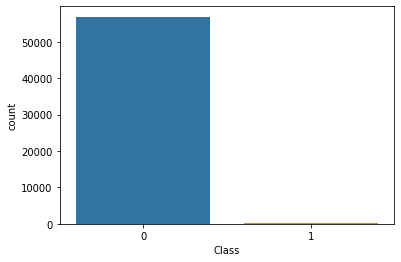

In [77]:
sns.countplot(x=xgb_pred.Class)
xgb_pred.Class.value_counts()

0    56864
1       98
Name: Class, dtype: int64

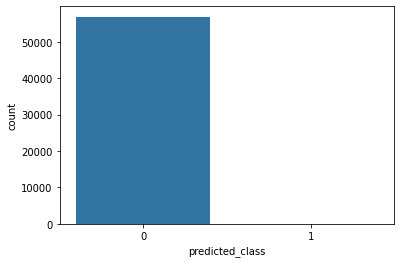

In [78]:
sns.countplot(x=xgb_pred.predicted_class)
xgb_pred.Class.value_counts()

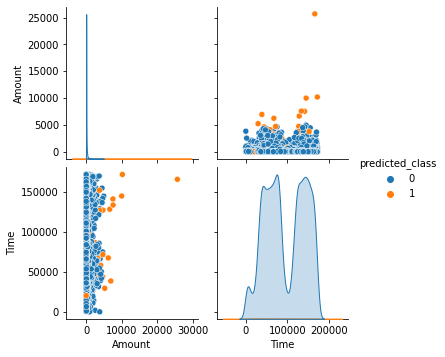

In [79]:
sns.pairplot(iforest_pred,x_vars=['Amount','Time'],y_vars=['Amount','Time'],kind='scatter',hue='predicted_class')

<AxesSubplot:xlabel='scores', ylabel='Density'>

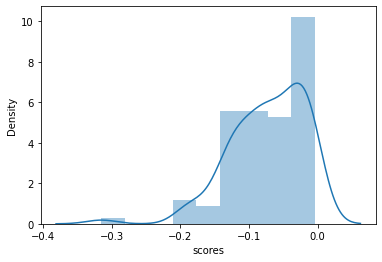

In [80]:
sns.distplot(iforest_pred[iforest_pred.predicted_class == 1].scores)

In [81]:
iforest_pred[iforest_pred.predicted_class == 1].scores.describe()

count    99.000000
mean     -0.073114
std       0.055304
min      -0.315070
25%      -0.111606
50%      -0.070257
75%      -0.027971
max      -0.003711
Name: scores, dtype: float64

<AxesSubplot:xlabel='scores', ylabel='Density'>

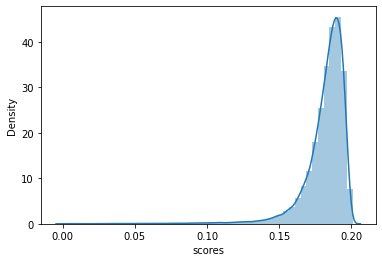

In [82]:
sns.distplot(iforest_pred[iforest_pred.predicted_class == 0].scores)

In [83]:
iforest_pred[iforest_pred.predicted_class == 0].scores.describe()

count    56863.000000
mean         0.181402
std          0.016287
min          0.000979
25%          0.177182
50%          0.185220
75%          0.190788
max          0.200706
Name: scores, dtype: float64

In [84]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
iforest_pred[iforest_pred.predicted_class == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,predicted_class,scores
40,146140.0,-6.133493,1.371835,-5.770578,-2.384282,-9.622621,13.470790,-0.795775,-18.592913,-2.399328,-4.778083,-0.869835,0.958136,-0.703806,2.096236,0.639514,1.898168,-0.008576,1.589432,-2.654056,0.193376,-10.233407,3.008718,-0.828517,1.021715,-1.868893,1.133050,2.236081,-1.378523,2031.02,0,1,-0.027755
550,32610.0,-7.189655,6.978507,-3.642243,-0.125557,-1.950690,7.518234,-14.834807,-34.535000,-2.837788,-5.139350,-0.485479,4.133542,-1.564512,4.959964,-0.504797,2.441416,1.088824,0.473675,-1.701352,5.755105,-7.937783,1.498444,3.146670,-1.671991,0.284759,0.123243,-0.123494,0.580233,3.68,0,1,-0.008717
653,141812.0,-34.614374,-29.145460,-14.985962,7.677798,-8.846632,5.571214,13.167616,-4.717060,6.091319,4.347796,3.054225,1.005763,3.110310,-2.610117,4.441177,5.021881,-1.679253,-3.138214,1.751576,-20.235060,-8.172558,-1.323059,-3.329551,0.452444,2.410307,0.580394,-1.363536,15.632689,1417.29,0,1,-0.148085
1847,28143.0,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,-3.722279,-8.120962,4.419943,-6.210941,1.063837,-5.843528,-0.108836,-5.606597,-11.756256,-4.714947,0.783578,1.703888,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891,99.99,1,1,-0.086519
2271,171234.0,-16.224299,12.730564,-12.841065,-1.141867,-8.986583,-3.077067,-8.219623,10.713656,2.367518,4.536268,-3.962664,3.780793,0.598057,6.122479,0.170371,1.911043,3.533903,0.583581,-1.135103,1.285604,0.427780,0.263553,1.551892,-0.142470,1.436109,-0.035261,0.524327,0.882698,3.82,0,1,-0.041258
3060,55614.0,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,-8.332863,5.763189,-8.707879,-1.716949,-9.577194,0.146369,-7.586491,-12.503931,-4.375631,2.465195,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83,1,1,-0.005967
3801,41237.0,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,-7.078424,-12.805683,6.786058,-13.064240,1.179525,-13.694873,0.951479,-10.954286,-20.583593,-7.517262,2.872354,-0.247648,2.479414,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,118.30,1,1,-0.077947
4098,160444.0,-28.623353,-19.262983,-13.042666,11.027770,-14.710239,9.042659,12.143391,-2.818318,5.376427,6.556983,0.838451,0.162703,2.226394,-2.967565,2.413155,4.622756,-0.921336,-0.567711,3.076979,-15.251547,-6.511789,-0.416771,-10.288551,1.315177,0.274091,0.189539,-6.007981,14.929133,2074.69,0,1,-0.139969
5225,133010.0,-23.103244,-23.866465,-5.699313,6.503369,11.184636,-6.196146,-6.909951,-1.785498,3.373336,2.718968,1.627024,2.458631,1.442617,0.252405,2.411592,1.747117,-0.012168,-2.989766,0.902210,-12.738325,-4.324577,-2.267901,-19.056701,1.151152,-2.977135,0.481818,7.138240,-7.756345,593.48,0,1,-0.077530
5395,10784.0,-9.791064,8.261750,-2.524941,-0.896418,-2.430637,4.530167,-8.784593,-22.159063,3.130838,2.344039,1.854359,0.237107,0.536751,3.185343,-0.823733,0.460981,2.675160,0.484895,-0.869686,-4.561608,22.588989,-8.527145,3.642683,-0.534120,0.489866,0.228191,1.152759,0.156205,10.76,0,1,-0.037322
